The goal of this execise is to measure the dip in a light curve. We can get a light curve from the MAST survey. We only want to look at the narrow time range 1412 to 1414 days. If you plot this you should see a pretty level flux value and then a dip and then a return to the same level value. 

Calculate the average flux outside of the dip, the average flux during the dip and how long the dip occurs. I'll start you off with how to read the fits file 

In [12]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# MAST URL location of the file we want to examine.
fits_file = 'https://mast.stsci.edu/api/v0.1/Download/file?uri=mast:TESS/product/tess2018292075959-s0004-0000000025155310-0124-s_lc.fits'

In [3]:
fits.info(fits_file)

Filename: /Users/ari/.astropy/cache/download/url/e401e561c2d035b05ce5d894e252fcd9/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  LIGHTCURVE    1 BinTableHDU    167   18684R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 11)   int32   


In [4]:
fits.getdata(fits_file, ext=1).columns

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'SAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'QUALITY'; format = 'J'; disp = 'B16.16'
    name = 'PSF_CENTR1'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR1_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'PSF_CENTR2'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR2_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'MOM_CENTR1'; format = 'D'; u

In [6]:
with fits.open(fits_file, mode="readonly") as hdulist:
    time = hdulist[1].data['TIME']
    flux = hdulist[1].data['SAP_FLUX']
    flux_err = hdulist[1].data['SAP_FLUX_ERR']

(1412.0, 1414.0)

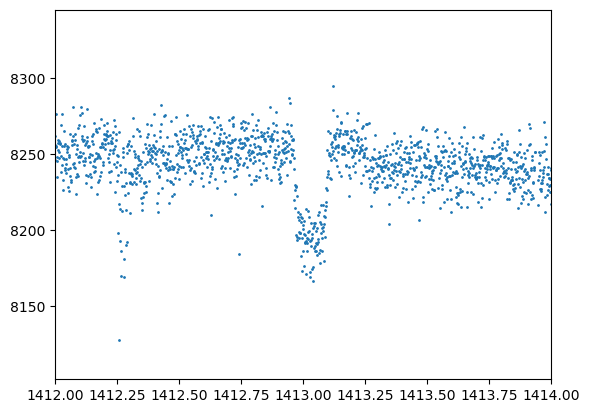

In [11]:
plt.scatter(time,flux,s=1)
plt.xlim(1412,1414)

(1412.0, 1414.0)

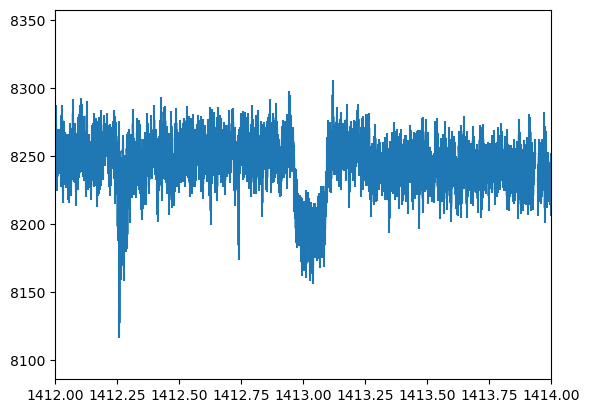

In [13]:
plt.errorbar(time,flux,yerr=flux_err)
plt.xlim(1412,1414)